In [1]:
from sklearn import datasets

In [2]:
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
x=np.linspace(-3,5,100)

In [5]:
y1=-5*x+1

In [6]:
y2=-4*x+1

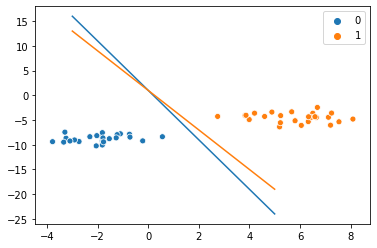

In [7]:
plt.plot(x,y1) # blue
plt.plot(x,y2) # orange
sns.scatterplot(X.T[0],X.T[1],hue=y)

Equation of the orange line:

y=-4x+1

Equation of the blue line:

y=-5x+1

You have to find out which line will act as a better classifier according to the SVM alsorithm and why?

In [8]:
# Creating dataframe of points
data = pd.DataFrame(data=X,columns=['x1','x2'])
data['y'] = [-1 if i==0 else i for i in y]
data.head(3)

,x1,x2,y
0,7.127313,-4.439442,1
1,6.688739,-2.448401,1
2,-1.100479,-7.784368,-1


In [9]:
# Function to find the minimun distance between support vectors

def find_dist(data,w1,w2,b):
    
    point_pos = list(data[data['y']==1][['x1','x2']].values)
    point_neg = list(data[data['y']==-1][['x1','x2']].values)

    dist_pos=[]
    dist_neg=[]
    
    # Support vector for positive points (y=1)
    for i in range(len(point_pos)):
        dist = abs(((w1*point_pos[i][0]) + (w2*point_pos[i][1]) + b)) / np.sqrt((w1)**2 + (w2)**2)
        dist_pos.append(dist)
        
    # Support vector for negative points (y=-1)
    for i in range(len(point_neg)):
        dist = abs(((w1*point_neg[i][0]) + (w2*point_neg[i][1]) + b)) / np.sqrt((w1)**2 + (w2)**2)
        dist_neg.append(dist)
        
    return min(dist_pos + dist_neg)

In [10]:
# line => y = -5x+1
# => 5x +y -1 = 0
# w1=5, w2=1, b=-1
find_dist(data,w1=5,w2=1,b=-1)

1.2894933062219867

In [11]:
# line => y = -4x+1
# => 4x +y -1 = 0
# w1=4, w2=1, b=-1
find_dist(data,w1=4,w2=1,b=-1)

1.3854137365383017

In [12]:
if find_dist(data,w1=5,w2=1,b=-1) > find_dist(data,w1=4,w2=1,b=-1):
    print("The 'Blue' line is the better classifier")
else:
    print("The 'Orange' line is the better classifier")

The 'Orange' line is a better classifier
